## Perturbation theory and condition numbers [10 points]

Let's start by asking how "hard" it is to solve a given linear system, $Ax=b$. You will apply perturbation theory to answer this question.

**Intuition: Continuous functions of a single variable.** To build your intuition, consider the simple case of a scalar function in a single continuous variable, $y = f(x)$. Suppose the input is perturbed by some amount, $\Delta x$. The output will also change by some amount, $\Delta y$. How large is $\Delta y$ relative to $\Delta x$?

Supposing $\Delta x$ is sufficiently small, you can approximate the change in the output by a Taylor series expansion of $f(x + \Delta x)$:

$$
  y + \Delta y = f(x + \Delta x) = f(x) + \Delta x \frac{df}{dx} + O(\Delta x^2).
$$

Since $\Delta x$ is assumed to be "small," we can approximate this relation by

$$
\begin{eqnarray}
    y + \Delta y & \approx & f(x) + \Delta x \frac{df}{dx} \\
        \Delta y & \approx & \Delta x \frac{df}{dx}.
\end{eqnarray}
$$

This result should not be surprising: the first derivative measures the sensitivity of changes in the output to changes in the input. We will give the derivative a special name: it is the _(absolute) condition number_. If it is very large in the vicinity of $x$, then even small changes to the input will result in large changes in the output. Put differently, a large condition number indicates that the problem is intrinsically sensitive, so we should expect it may be difficult to construct an accurate algorithm.

In addition to the absolute condition number, we can define a _relative_ condition number for the problem of evaluating $f(x)$.

$$
\begin{eqnarray}
                \Delta y &  \approx   & \Delta x \frac{df}{dx} \\
                         & \Downarrow & \\
  \frac{|\Delta y|}{|y|} &  \approx   & \frac{|\Delta x|}{|x|} \cdot \underbrace{\frac{|df/dx| \cdot |x|}{|f(x)|}}_{\kappa_f(x)}.
\end{eqnarray}
$$

Here, the underscored factor, defined to be $\kappa_f(x)$, is the relative analogue of the absolute condition number. Again, its magnitude tells us whether the output is sensitive to the input.

**Perturbation theory for linear systems.** What if we perturb a linear system? How can we measure its sensitivity or "intrinsic difficulty" to solve?

First, recall the following identities linear algebraic identities:

* _Triangle inequality_: $\|x + y\|_2 \leq \|x\|_2 + \|y\|_2$
* _Norm of a matrix-vector product_: $\|Ax\|_2 \leq \|A\|_F\cdot\|x\|_2$
* _Norm of matrix-matrix product_: $\|AB\|_F \leq \|A\|_F\cdot\|B\|_F$

To simplify the notation a little, we will drop the "$2$" and "$F$" subscripts.

Suppose all of $A$, $b$, and the eventual solution $x$ undergo additive perturbations, denoted by $A + \Delta A$, $b + \Delta b$, and $x + \Delta x$, respectively. Then, subtracting the original system from the perturbed system, you would obtain the following.

$$
\begin{array}{rrcll}
   &         (A + \Delta A)(x + \Delta x) & = & b + \Delta b & \\
- [&                                   Ax & = & b & ] \\
\hline
   & \Delta A x + (A + \Delta A) \Delta x & = & \Delta b & \\
\end{array}
$$

Now look more closely at the perturbation, $\Delta x$, of the solution. Let $\hat{x} \equiv x + \Delta x$ be the perturbed solution. Then the above can be rewritten as,

$$\Delta x = A^{-1} \left(\Delta b - \Delta A \hat{x}\right),$$

where we have assumed that $A$ is invertible. (That won't be true for our overdetermined system, but let's not worry about that for the moment.)

How large is $\Delta x$? Let's use a norm to measure it and bound it using 

$$
\begin{array}{rcl}
  \|\Delta x\| &   =   & \|A^{-1} \left(\Delta b - \Delta A \hat{x}\right)\| \\
               &  \leq & \|A^{-1}\|\cdot\left(\|\Delta b\| + \|\Delta A\|\cdot\|\hat{x}\|\right).
\end{array}
$$

You can rewrite this as follows:

$$
\begin{array}{rcl}
  \frac{\|\Delta x\|}
       {\|\hat{x}\|}
    & \leq &
    \|A^{-1}\| \cdot \|A\| \cdot \left(
                                   \frac{\|\Delta A\|}
                                        {\|A\|}
                                   +
                                   \frac{\Delta b}
                                        {\|A\| \cdot \|\hat{x}\|}
                                 \right).
\end{array}
$$

This bound says that the relative error of the perturbed solution, compared to relative perturbations in $A$ and $b$, scales with the product, $\|A^{-1}\| \cdot \|A\|$. This factor is the linear systems analogue of the condition number for evaluating the function $f(x)$! As such, we define

$$\kappa(A) \equiv \|A^{-1}\| \cdot \|A\|$$

as the _condition number of $A$_ for solving linear systems.

What values of $\kappa(A)$ are "large?" Generally, you want to compare $\kappa(A)$ to $1/\epsilon$, where $\epsilon$ is _machine precision_, which is the [maximum relative error under rounding](https://sites.ualberta.ca/~kbeach/phys420_580_2010/docs/ACM-Goldberg.pdf). We may look more closely at floating-point representations later on, but for now, a good notional value for $\epsilon$ is about $10^{-7}$ in single-precision and $10^{-15}$ in double-precision. (In Python, the default format for floating-point values is double-precision.)

This analysis explains why solving the normal equations directly could lead to computational problems. In particular, one can show that $\kappa(X^T X) \approx \kappa(X)^2$, which means forming $X^T X$ explicitly may make the problem harder to solve by a large amount.

## Examples

Let's look at some examples of conditioning.

First, recall the data matrix from Part 1.

In [4]:
import pandas as pd
import numpy as np

from IPython.display import display

VARIABLES = ['BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']
df = pd.read_table ('bloodpress.txt', usecols=VARIABLES)

RESPONSE = 'BP'
PREDICTORS = ['Weight', 'BSA']

y = df.as_matrix ([RESPONSE])
m = len (y)

X_initial = df.as_matrix (PREDICTORS)
X = np.insert (X_initial, [0], [[1.]] * m, axis=1)

print ("X (first five rows):\n")
print (X[:5])

X (first five rows):

[[  1.    85.4    1.75]
 [  1.    94.2    2.1 ]
 [  1.    95.3    1.98]
 [  1.    94.7    2.01]
 [  1.    89.4    1.89]]


**Exercise 1** (1 point). Use Numpy's condition number estimator, `np.linalg.cond()`, to estimate the condition numbers for a) $X$ and b) $X^T X$. Use the form of the condition number based on the two-norm. Store the results in `cond_X` and `cond_XTX`, respectively.

In [7]:
cond_X = np.linalg.cond(X)
cond_XTX = np.linalg.cond(X.T.dot(X))

In [8]:
from IPython.display import display, Math, Latex

display (Math (r'\kappa(X) \approx {:.0f}'.format (cond_X)))
display (Math (r'\kappa(X)^2 \approx {:.0f}'.format (cond_X**2)))
display (Math (r'\kappa(X^T X) \approx {:.0f}'.format (cond_XTX)))

assert 1. <= cond_X <= 3e3
assert 1. <= cond_XTX <= 6e6

print ("\n(Passed.)")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


(Passed.)


**Example.** Let's look at a system that is ill-conditioned and see what happens when we make a tiny perturbation to it.

In [11]:
A = np.array([(1., 1000.),
              (2.**(-10) + 2.**(-11), 1.)])

print ("A ==\n", A)
print ("\ncond (A) == ", np.linalg.cond (A))

A ==
 [[  1.00000000e+00   1.00000000e+03]
 [  1.46484375e-03   1.00000000e+00]]

cond (A) ==  2151264.80673


In [12]:
Delta_A = np.array ([(0., 0.),
                     (-2.**(-11), 0.)
                    ])
B = A + Delta_A

print ("B := A + dA ==\n", B)
print ("\ncond (B) / cond (A) == ",
      np.linalg.cond (B) / np.linalg.cond (A))

B := A + dA ==
 [[  1.00000000e+00   1.00000000e+03]
 [  9.76562500e-04   1.00000000e+00]]

cond (B) / cond (A) ==  19.8333333333


In [13]:
b = np.array([1., 1.])

x_A = np.linalg.solve (A, b)
print ("x ~= A^(-1)*b == ", x_A)

x_B = np.linalg.solve (B, b)
print ("x ~= B^(-1)*b == ", x_B)

x ~= A^(-1)*b ==  [  2.14910924e+03  -2.14810924e+00]
x ~= B^(-1)*b ==  [-42624.        42.625]


**Example.** Here is another example, taken from [Trefethen and Bau (1997)](http://bookstore.siam.org/ot50/) with Python code by [Da Kuang (2014)](http://math.ucla.edu/~dakuang/).

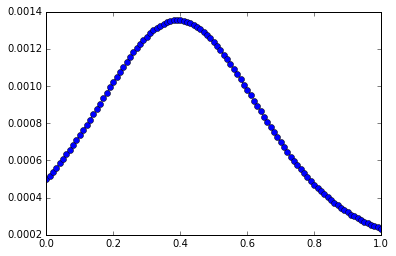

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

m = 101

t = np.linspace (0., 1., m)
y = np.exp (np.sin (4*t))
y /= 2006.787453080206

plt.plot (t, y, 'o--')

**Exercise 2** (2 points). The following code creates a matrix, $X$, based on the data created above. Explain what approximately solving the system $X \alpha \approx y$ for the vector $\alpha$ does, effectively, given $y$ as computed above (`y[0:m]`).

In [23]:
n = 15
X = np.zeros ((m, n))

for j in range (n):
    X[:, j] = np.power (t, j)
    
print ("Condition number of X: %g" % np.linalg.cond (X))

Condition number of X: 2.27251e+10


It tries to solve the linear system defined in the previous cell, but the high condition number indicates the difficulty in solving it.


**Exercise 3** (2 points). Compute the solution to this problem by solving the normal equations. Store your solution in a vector `alpha1`.

Your solution, alpha1:
[  4.98267147e-04   2.00426177e-03   3.47994025e-03   9.36976525e-03
  -1.05343656e-01   4.52744566e-01  -1.55065824e+00   2.67490155e+00
  -8.31257799e-01  -3.79840965e+00   5.27260177e+00  -1.55556681e+00
  -1.74422810e+00   1.53006481e+00  -3.59966890e-01]


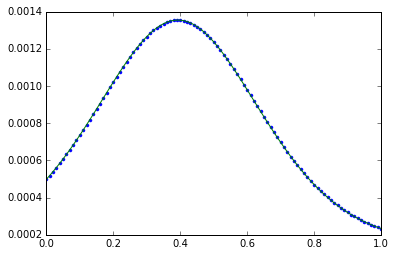

In [25]:
y1 = X.T.dot(y[0:m])
X1 = X.T.dot(X)

alpha1 = np.linalg.solve (X1, y1)

print ("Your solution, alpha1:")
print (alpha1)

plt.plot (t, y, '.', t, X.dot (alpha1), '-')


Residual two-norm squared:
1.46904809512e-14

(Passed.)


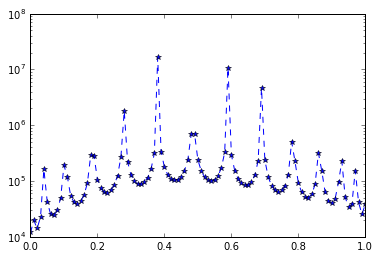

In [26]:
r1 = X.dot (alpha1) - y
r1_norm2 = np.linalg.norm (r1, 2)**2

plt.semilogy (t, np.abs (y/r1), '*--')

print ("\nResidual two-norm squared:")
print (r1_norm2)
assert r1_norm2 <= 1e-13

print ("\n(Passed.)")

Numpy's built-in linear least squares solver uses a different algorithm. Compare its solution to the one computed by solving the normal equations.

Numpy's built-in linear least squares solver:
[  4.98315243e-04   1.98997701e-03   4.21311915e-03  -6.24109423e-03
   7.43887387e-02  -8.18667286e-01   4.38684058e+00  -1.64200319e+01
   4.24529015e+01  -7.35499623e+01   8.47383199e+01  -6.41161751e+01
   3.06343451e+01  -8.38229064e+00   1.00010491e+00]

Two-norm squared: 1.19242078709e-15

|alpha1 ./ alpha2| ==
[ 0.99990348  1.00717836  0.82597717 -1.50130168 -1.4161237  -0.55302633
 -0.3534795  -0.16290477 -0.01958071  0.05164394  0.06222217  0.02426169
 -0.05693701 -0.1825354  -0.35992913]


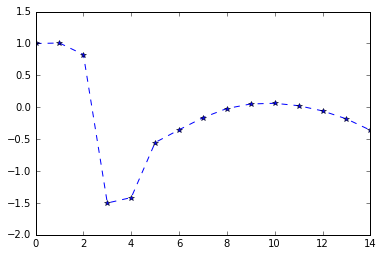

In [27]:
alpha2 = np.linalg.lstsq (X, y)[0]

print ("Numpy's built-in linear least squares solver:")
print (alpha2)

r2 = X.dot (alpha2) - y
r2_norm2 = np.linalg.norm (r2, 2)**2

print ("\nTwo-norm squared:", r2_norm2)

print ("\n|alpha1 ./ alpha2| ==")
print (alpha1 / alpha2)

plt.plot (alpha1 / alpha2, '*--')

**Example: Nearly collinear predictors.** Another more practical situation in which poor conditioning can arise in linear regression modeling is when you include two strongly correlated predictors.

**Exercise 4** (2 points). Create an $m \times 2$ data matrix `X` with two columns of nearly collinear predictors. That is, if $x_0$ and $x_1$ are the columns, then create these columns such that they are not identical but have a correlation coefficient close to 1.0 and a condition number that is at least $10^{16}$.

> You can compute the correlation coefficient between two vectors `a` and `b` by using Numpy's built-in method, `np.corrcoef(a, b)`.

In [33]:
M = 10 # Number of rows

X = np.ones(shape = (M,2))

X[1][0]+=1

X[:, 1] = X[:, 0]*10

XTX = X.T.dot(X)
print ('cond (X):', np.linalg.cond (X))
print ('cond (X^T*X):', np.linalg.cond (XTX))

cond (X): 4.32801553338e+16
cond (X^T*X): 1.3998733348e+17


In [34]:
corr_coef = np.corrcoef (X[:, 0], X[:, 1])[0, 1]
print ("Correlation coefficient: {:.15f}".format (corr_coef))
assert corr_coef >= 0.99

print ("\n(Passed.)")

Correlation coefficient: 1.000000000000000

(Passed.)


**Exercise 5** (1 point). Let $\theta^T = (0.1, 0.1)$ be the true solution of this problem. Compute the corresponding right-hand side, $y = X \theta$. Call your right-hand side vector `y`.

In [36]:
theta_true = np.array ([[0.1], [0.1]])

y = X.dot(theta_true)

**Exercise 6** (2 points). Solve this system $X \theta = y$ using the normal equations method, given `y` but "pretending" that you do not know `theta_true`. Store your result as `theta_1`. How does it compare to `theta_true`?

In [37]:
X2 = X.T.dot(X)

y2 = X.T.dot(y)

theta_1 = np.linalg.solve(X2,y2)

print (theta_1)

[[-3.93846154]
 [ 0.50384615]]


**Exercise 7** (1 point). Use Numpy's built-in least squares solver instead (`np.linalg.lstsq()`), storing its estimate as a vector `theta_2`. Does it give a better answer?

In [38]:
theta_2 = np.linalg.lstsq(X,y)

print (theta_2)

(array([[ 0.01089109],
       [ 0.10891089]]), array([], dtype=float64), 1, array([  3.62353419e+01,   8.37227630e-16]))
